In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
measles_raw_data = pd.read_csv("measles - measles.csv")
measles_raw_data.head()
measles_raw_data.groupby("year").count()

C:\Users\trvaughn\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,state,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
year,,,,,,,,,,,,,,,
2017,1939,1939,1939,0,1939,0,0,1939,1939,1939,0,0,0,1939,1939
2017-18,10418,10418,10418,7183,6060,10390,0,4970,10418,10418,9,1829,2698,10410,10410
2018-19,48075,48075,48075,22308,34573,43788,0,40900,48075,48075,84,17723,4483,46539,46539


In [3]:
measles_clean = measles_raw_data.drop(columns=["xper", "xmed", "xrel", "district", "year", "county", "enroll"])
# measles_clean = measles_clean.dropna()

measles_clean.dtypes

index        int64
state       object
name        object
type        object
city        object
mmr        float64
overall    float64
lat        float64
lng        float64
dtype: object

In [4]:
# neg_count = measles_clean.loc[["mmr" == "-1"]]
# len(neg_count)

measles_clean['mmr'].value_counts()
measles_clean['overall'].value_counts()

-1.000000      27224
 98.000000      5191
 100.000000     3619
 95.000000      3051
 99.000000      1764
               ...  
 90.140845         1
 96.020000         1
 43.640000         1
 98.098859         1
 90.052356         1
Name: overall, Length: 2691, dtype: int64

In [5]:
# Remove -1 values
measles_clean = measles_clean.loc[measles_clean["mmr"] >= 0]
measles_clean = measles_clean.loc[measles_clean["overall"] >= 0]
measles_clean

,index,state,name,type,city,mmr,overall,lat,lng
2018,1,California,Abby Reinke Elementary,Public,Temecula,99.00,96.00,33.492008,-117.087291
2019,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,33.741155,-117.902009
2020,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,34.077328,-117.317020
2021,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,34.227892,-118.252604
2022,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,33.734440,-116.373073
...,...,...,...,...,...,...,...,...,...
63242,1364,Washington,Overcomer Academy,NaN,Auburn,23.53,17.65,47.301117,-122.276320
63243,1365,Washington,Salvation Christian Academy- Formerly Slavic C...,NaN,Edgewood,22.22,22.22,47.249023,-122.287615
63244,1366,Washington,Saratoga,NaN,Stanwood,20.00,20.00,48.242579,-122.359097
63245,1367,Washington,Skagit Family Learning Center,NaN,Mount Vernon,17.65,11.76,48.406426,-122.339166


In [7]:
# Make series to create pie chart
school_type = measles_clean.groupby('type')

count_school_type = school_type['type'].count()
count_school_type

type
BOCES              47
Charter           276
Kindergarten     1488
Nonpublic         173
Private          6815
Public          20692
Name: type, dtype: int64

In [8]:
# Dealing with the NaN's
measles_clean["type"].fillna("Other", inplace = True)

In [10]:
# Fix error - Terra 
school_type_pie = count_school_type.plot(kind="pie", figsize = (8,8), subplots=True, fontsize=15, autopct='%0.1f%%', \
                                         labels=['Kindergarten', 'Other', 'Private', 'Public'], title=['School Type']) 
# school_type_pie.set_ylabel("Types of Schools")
# plt.axis('equal') 
# plt.title('Type of School')

plt.show()                           
plt.tight_layout()
# type_vals = type_count['type']
# type_labels = type_count['index']

TypeError: unhashable type: 'list'

In [11]:
state_percents = measles_clean.groupby('state')

count_state_percents = state_percents['type'].count()
count_state_percents

state
Arizona            1451
Arkansas            567
California        16098
Colorado           1509
Connecticut         795
Florida            2678
Idaho               475
Illinois           7686
Iowa               1370
Maine               357
Massachusetts      1594
Michigan           2351
Minnesota          1813
Missouri            748
Montana             645
New Jersey         2211
New York           4275
North Carolina     2085
North Dakota        387
Ohio               3165
Oklahoma           1249
Oregon              817
Pennsylvania       1939
Rhode Island        230
South Dakota        390
Tennessee          1152
Texas               811
Utah                604
Vermont             349
Virginia           1468
Washington         2221
Wisconsin          2623
Name: type, dtype: int64

ValueError: 'label' must be of length 'x'

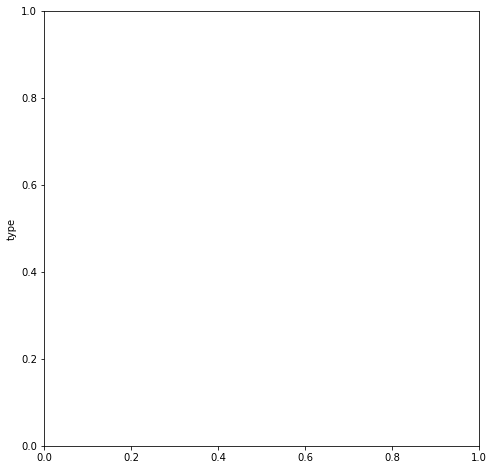

In [12]:
school_type_pie = count_state_percents.plot(kind="pie", figsize = (8,8), subplots=True, fontsize=14, autopct='%0.1f%%', \
                                         labels=['California', 'Colorado', 'Ohio', 'Oregon', 'Vermont', 'Washington'], \
                                         title=['Number of Schools by State']) 

# texts[0].set_fonsize(4)
plt.show()                           
plt.tight_layout()

## SCATTER PLOT: LATITUDE vs LONGITUDE

In [ ]:
df1 = pd.DataFrame(measles_clean, columns=["lat", "lng"])
df1.plot.scatter(x="lng", y="lat");

plt.title("Scatter Plot: Latitude vs Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.savefig('s1.png')

Points on the extreme right are erroneous and must be dropped from the table. The easternmost point in the contiguous US is West Quoddy Head Lighthouse (Maine) with the coordinates (44.81756628922163, -66.95132155560584) so we can't have any longitude value greater than - 66.95132155560584.

In [ ]:
# Keeping only negative longitudes
measles_clean_lng = measles_clean[measles_clean['lng'] < 0]

In [ ]:
# Re-drawing the scatter
df2 = pd.DataFrame(measles_clean_lng, columns=["lat", "lng"])
df2.plot.scatter(x="lng", y="lat");

plt.title("Scatter Plot: Latitude vs Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.savefig('s2.png')

In [ ]:
measles_clean["type"].fillna("Other", inplace = True)
measles_clean

In [ ]:
type_groups = measles_clean.groupby("type")
type_groups.count()

In [ ]:
# Melissa's code starts here

In [ ]:
# Set up Public, Private, Kindergarten, and Other dataframes

public_stats = measles_clean.loc[measles_clean["type"] == "Public"]
# public_stats

private_stats = measles_clean.loc[measles_clean["type"] == "Private"]
# private_stats

kindergarten_stats = measles_clean.loc[measles_clean["type"] == "Kindergarten"]
# kindergarten_stats

other_stats = measles_clean.loc[measles_clean["type"] == "Other"]
# other_stats

colorado = measles_clean.loc[measles_clean["state"] == "Colorado"]
# colorado.groupby("type").count()

In [ ]:
# Loop through the data frame to calculate stats by state

# Set up empty lists to fill in for loop
states = measles_clean["state"].unique()
# states
count_states = []
mean_mmr = []
median_mmr = []
public_mean = []
public_median = []
private_mean = []
private_median = []
kind_mean = []
kind_median = []
other_mean = []
other_median = []

for state in states:
    
    # Identify what state to work with
    state_active = measles_clean.loc[measles_clean["state"] == state]
    
    # Count all the schools for each state
    count_active = state_active["state"].count()
    count_states.append(count_active)
    
    # Calculate mean for each state
    mean_active = state_active["mmr"].mean()
    mean_mmr.append(mean_active)
    
    # Calculate median for each state
    median_active = state_active["mmr"].median()
    median_mmr.append(median_active)
    
    # Reset state_active for use on public subsets
    state_active = public_stats.loc[public_stats["state"] == state]
    
    # Calculate mean for public schools
    public_active = state_active["mmr"].mean()
    public_mean.append(public_active)
    
    # Calculate median for public schools
    public_active = state_active["mmr"].median()
    public_median.append(public_active)
    
    # Reset state_active for use on private subsets
    state_active = private_stats.loc[private_stats["state"] == state]
    
    # Calculate mean for private schools
    private_active = state_active["mmr"].mean()
    private_mean.append(private_active)
    
    # Calculate median for private schools
    private_active = state_active["mmr"].median()
    private_median.append(private_active)
    
    # Reset state_active for use on kindergarten subsets
    state_active = kindergarten_stats.loc[kindergarten_stats["state"] == state]
    
    # Calculate mean for kindergarten schools
    kind_active = state_active["mmr"].mean()
    kind_mean.append(kind_active)
    
    # Calculate median for kindergarten schools
    kind_active = state_active["mmr"].median()
    kind_median.append(kind_active)
    
    # Reset state_active for use on other subsets
    state_active = other_stats.loc[other_stats["state"] == state]
    
    # Calculate mean for Other schools
    other_active = state_active["mmr"].mean()
    other_mean.append(other_active)
    
    # Calculate median for Other schools
    other_active = state_active["mmr"].median()
    other_median.append(other_active)
   
       
# other_median

In [ ]:
# Set up summary table of averages per state
avg_by_state = pd.DataFrame({
    "State": states
})

avg_by_state["Count of Schools"] = count_states
avg_by_state["Overall Mean"] = mean_mmr
avg_by_state["Overall Median"] = median_mmr
avg_by_state["Public Mean"] = public_mean
avg_by_state["Public Median"] = public_median
avg_by_state["Private Mean"] = private_mean
avg_by_state["Private Median"] = private_median
avg_by_state["Kindergarten Mean"] = kind_mean
avg_by_state["Kindergarten Median"] = kind_median
avg_by_state["Other Mean"] = other_mean
avg_by_state["Other Median"] = other_median

avg_by_state

# Investigate NaNs
# Indicate a lack of that school type reporting out of that state

In [ ]:
#New column for coloring states
measles_clean_lng['state2'] = measles_clean_lng['state']

In [ ]:
# Plot of school counts across states

y_axis = count_states
x_axis = np.arange(len(states))

plt.bar(x_axis, y_axis, color="green")
plt.ylabel("Number of Schools")
plt.xlabel("State")
plt.title("Count of Schools in States in Dataset", fontsize=15)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="45", fontsize=12)

plt.show()
# Look at California alone

Looking at the count of schools across the states allows us to know if our sample sizes in each state are comparable.  While based on sheer numbers, this chart shows they are not, what we do not know is whether the proportion of schools that reported data out of the entire population is similar across states.  Either way, it is clear from the start difference in the count of schools from California that that state is worth looking at on its own as well.

In [ ]:
# Assigning numerical values to state names for coloring
measles_clean_lng.loc[measles_clean_lng['state'] == 'California', 'state2'] = 1
measles_clean_lng.loc[measles_clean_lng['state'] == 'Colorado', 'state2'] = 2
measles_clean_lng.loc[measles_clean_lng['state'] == 'Ohio', 'state2'] = 3
measles_clean_lng.loc[measles_clean_lng['state'] == 'Oregon', 'state2'] = 4
measles_clean_lng.loc[measles_clean_lng['state'] == 'Washington', 'state2'] = 5
measles_clean_lng.loc[measles_clean_lng['state'] == 'Vermont', 'state2'] = 6

In [ ]:
# Plot with grouped bars -- MEAN AND MEDIAN BY STATE
# https://matplotlib.org/3.3.4/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# Add rates to bars, if possible

x = np.arange(len(states))  
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_mmr, width, label="Mean")
rects2 = ax.bar(x + width/2, median_mmr, width, label="Median")

plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("State")
plt.title("Mean and Median of MMR Innoculation Rates across States in Dataset", fontsize=15)
plt.legend(loc="lower right")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="45", fontsize=12)

plt.show()

By displaying the mean and median vaccination rates together, we can see not only how each rate differs across states but how consistently the mean is lower than the median rate for each state.  What this tells us is that there may be lower reported rates of vaccination at a sufficient number of schools in each state to pull the mean rate down.  Looking at the median as well is a reminder that that the actual reported rates may be higher than the mean only would lead a person to infer.  Because this difference holds true across states, it feels like an important trend to hold in mind when using either form of average.

In [ ]:
# Colored scatte rplot
dfScat = measles_clean_lng[['lng','lat', 'state2']]
#axScat = dfScat.plot(kind='scatter', x=0, y=1, c=2, colormap='inferno')
#axScat = dfScat.plot(kind='scatter', x=0, y=1, c=2, colormap='plasma')
#axScat = dfScat.plot(kind='scatter', x=0, y=1, c=2, colormap='viridis')
axScat = dfScat.plot(kind='scatter', x=0, y=1, c=2, colormap='magma')

In [ ]:
# Grouped bar chart of all averages across all states and school types
# Formatting is being disagreable

group_by_state = avg_by_state.drop(["Count of Schools"], axis=1)

state_group_fig = group_by_state.plot.bar(rot=45)

plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("State")
plt.title("Mean and Median of MMR Innoculation Rates across States and School Types in Dataset", fontsize=15)
plt.legend(loc="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="45", fontsize=12)

plt.show()

In [ ]:
# Boxplot of school types
type_boxplot = measles_clean_lng[['mmr','type']]
type_boxplot.boxplot(by='type')
avg_by_state

# Isolate mean and median
median_by_state = avg_by_state.drop(columns=["Count of Schools", "Overall Mean",
                                             "Public Mean", "Kindergarten Mean", 
                                             "Private Mean", "Other Mean"])
# median_by_state # Giving me shit about "Overall Mean"

mean_by_state = avg_by_state.drop(columns=["Count of Schools", "Overall Median", 
                                           "Public Median", "Private Median",
                                          "Kindergarten Median", "Other Median"])
# median_by_state

In [ ]:
# Grouped bar chart with isolated means and medians
# Means
mean_group_fig = mean_by_state.plot.bar(rot=45)

plt.ylabel("Mean of MMR Innoculation Rates")
plt.xlabel("State")
plt.title("Mean of MMR Innoculation Rates across States and School Types in Dataset", fontsize=15)
plt.legend(loc="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="45", fontsize=12)

plt.show()

In [ ]:
# Grouped bar chart with isolated means and medians
# Medians
median_group_fig = median_by_state.plot.bar(rot=45)

plt.ylabel("Median of MMR Innoculation Rates")
plt.xlabel("State")
plt.title("Median of MMR Innoculation Rates across States and School Types in Dataset", fontsize=15)
plt.legend(loc="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="45", fontsize=12)

plt.show()

In [ ]:
# Alternate California Ohio Grouped Plot
# This might be better/more useful if the ticks were the school type and each had 

california_ohio = avg_by_state.loc[avg_by_state["Public Mean"] >= 0]
california_ohio = california_ohio.drop(columns=["Count of Schools", 
                                                "Kindergarten Mean", "Kindergarten Median",
                                                "Other Mean", "Other Median"])
cal_oh_labels = california_ohio["State"]
california_group_fig = california_ohio.plot.bar(rot=45)
x_axis = np.arange(len(cal_oh_labels))
plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("State")
plt.title("Mean and Median of MMR Innoculation Rates in California and Ohio", fontsize=15)
plt.legend(loc="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, cal_oh_labels, rotation="45", fontsize=12)

plt.show()

In [ ]:
california_ohio = california_ohio.reset_index(drop=True)
california_ohio = california_ohio.drop(columns=["State"])
ohio_cali = california_ohio.T
# ohio_cali.rename(columns={0: "California", 2: "Ohio"})
ohio_cali

In [ ]:
ohio_cali
oh_cal_labels = ohio_cali.index
oh_cal_group_fig = ohio_cali.plot.bar(rot=45)
x_axis = np.arange(len(oh_cal_labels))
plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("School and Average Type")
plt.title("Mean and Median of MMR Innoculation Rates in California and Ohio", fontsize=15)
legend_text=plt.legend(loc="center")
legend_text.get_texts()[0].set_text("California")
legend_text.get_texts()[1].set_text("Ohio")
# Legend text issues resolved with help from Stack Overflor
# https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, oh_cal_labels, rotation="45", fontsize=12)

plt.show()

In [ ]:
# Testing Average by type
avg_by_type = avg_by_state.drop(columns=["Count of Schools"])
avg_by_type = avg_by_type.drop(columns=["State"])
avg_by_type = avg_by_type.T
avg_by_type

In [ ]:
# Chart of Mean and Medians grouped together

avg_by_type
type_labels = avg_by_type.index
type_group_fig = avg_by_type.plot.bar(rot=45)
x_axis = np.arange(len(type_labels))
plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("School and Average Type")
plt.title("Mean and Median of MMR Innoculation Rates in All States", fontsize=15)
legend_text=plt.legend(loc="center")
legend_text.get_texts()[0].set_text("California")
legend_text.get_texts()[1].set_text("Colorado")
legend_text.get_texts()[2].set_text("Ohio")
legend_text.get_texts()[3].set_text("Oregon")
legend_text.get_texts()[4].set_text("Vermont")
legend_text.get_texts()[5].set_text("Washington")

# Legend text issues resolved with help from Stack Overflor
# https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, type_labels, rotation="45", fontsize=12)

plt.show()

In [ ]:
print(states)
avg_by_state
mean_by_type = avg_by_state.drop(columns=["Count of Schools", "State", 
                                          "Overall Median", "Public Median", 
                                          "Kindergarten Median", "Other Median"])
mean_by_type = mean_by_type.T
mean_by_type

median_by_type = avg_by_state.drop(columns=["Count of Schools", "State", 
                                          "Overall Mean", "Public Mean", 
                                          "Kindergarten Mean", "Other Mean"])
median_by_type = median_by_type.T
median_by_type

In [ ]:
# Chart of Mean by type

mean_by_type
type_labels = mean_by_type.index
type_group_fig = mean_by_type.plot.bar(rot=45)
x_axis = np.arange(len(type_labels))
plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("School and Average Type")
plt.title("Mean of MMR Innoculation Rates in All States", fontsize=15)
legend_text=plt.legend(loc="center")
legend_text.get_texts()[0].set_text("California")
legend_text.get_texts()[1].set_text("Colorado")
legend_text.get_texts()[2].set_text("Ohio")
legend_text.get_texts()[3].set_text("Oregon")
legend_text.get_texts()[4].set_text("Vermont")
legend_text.get_texts()[5].set_text("Washington")

# Legend text issues resolved with help from Stack Overflor
# https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, type_labels, rotation="45", fontsize=12)

plt.show()

In [ ]:
# Chart for Median only

median_by_type
type_labels = median_by_type.index
type_group_fig = median_by_type.plot.bar(rot=45)
x_axis = np.arange(len(type_labels))
plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("School and Average Type")
plt.title("Median of MMR Innoculation Rates in All States", fontsize=15)
legend_text=plt.legend(loc="center")
legend_text.get_texts()[0].set_text("California")
legend_text.get_texts()[1].set_text("Colorado")
legend_text.get_texts()[2].set_text("Ohio")
legend_text.get_texts()[3].set_text("Oregon")
legend_text.get_texts()[4].set_text("Vermont")
legend_text.get_texts()[5].set_text("Washington")

# Legend text issues resolved with help from Stack Overflor
# https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, type_labels, rotation="60", fontsize=12)

plt.show()

In [ ]:
# Drop all columns in type dfs to leave a list of mmr rates for each

public_rates = public_stats["mmr"]
private_rates = private_stats["mmr"]
kind_rates = kindergarten_stats["mmr"]
other_rates = other_stats["mmr"]

In [ ]:
# Look at data in groups of states
# California only

california = avg_by_state.loc[avg_by_state["State"] == "California"]
california = california.drop(columns= ["State", "Count of Schools", 
                                      "Kindergarten Mean", "Kindergarten Median", 
                                      "Other Mean", "Other Median"])

cali_labels = california.columns
california = california.T
cali_data = california[0]
# cali_data

ohio = avg_by_state.loc[avg_by_state["State"] == "Ohio"]
ohio = ohio.drop(columns= ["State", "Count of Schools", 
                                      "Kindergarten Mean", "Kindergarten Median", 
                                      "Other Mean", "Other Median"])


ohio_labels = ohio.columns
ohio = ohio.T
ohio_data = ohio[2]
# ohio_data


In [ ]:
#California Only
# Plot the data

y_axis = cali_data
x_axis = np.arange(len(cali_labels))

# Tell matplotlib to make a bar chart
plt.bar(x_axis, y_axis, color="green", alpha=0.6, align="center")

# Formatting

plt.title("California Vaccination Averages")
plt.xlabel("School and Average Type")
plt.ylabel("Vaccination Rates")
plt.ylim(0, 100)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, cali_labels, rotation="45")

plt.show()

In [ ]:
# Ohio only
# Plot the data

y_axis = ohio_data
x_axis = np.arange(len(ohio_labels))

# Tell matplotlib to make a bar chart
plt.bar(x_axis, y_axis, color="green", alpha=0.6, align="center")

# Formatting

plt.title("Ohio Vaccination Averages")
plt.xlabel("School and Average Type")
plt.ylabel("Vaccination Rates")
plt.ylim(0, 100)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ohio_labels, rotation="45")

plt.show()

In [ ]:
# Rylee's code begins here!

In [ ]:
# Borrowed Melissa's variables in order to pull out values based on type
# Set up Public, Private, Kindergarten, and Other dataframes

public_stats = measles_clean.loc[measles_clean["type"] == "Public"]
# public_stats

private_stats = measles_clean.loc[measles_clean["type"] == "Private"]
# private_stats

kindergarten_stats = measles_clean.loc[measles_clean["type"] == "Kindergarten"]
# kindergarten_stats

other_stats = measles_clean.loc[measles_clean["type"] == "Other"]
# other_stats

In [ ]:
# Type averages plot setup

public_mmr_mean = public_stats['mmr'].mean()
# public_mmr_mean

private_mmr_mean = private_stats['mmr'].mean()
# private_mmr_mean

kindergarten_mmr_mean = kindergarten_stats['mmr'].mean()
# kindergarten_mmr_mean

other_mmr_mean = other_stats['mmr'].mean()
# other_mmr_mean

# Just doing hypothesis testing right now
# We are trying to prove that mmr rates vary by school type

st.f_oneway(public_stats['mmr'], private_stats['mmr'], kindergarten_stats['mmr'], other_stats['mmr'])

In [ ]:
# Taking out the "other" school type
st.f_oneway(public_stats['mmr'], private_stats['mmr'], kindergarten_stats['mmr'])

In [ ]:
# Taking out the "kindergarten" school type
st.f_oneway(public_stats['mmr'], private_stats['mmr'], other_stats['mmr'])

In [ ]:
# Taking out the "private" school type
st.f_oneway(public_stats['mmr'], kindergarten_stats['mmr'], other_stats['mmr'])

In [ ]:
# Taking out the "public" school type
st.f_oneway(private_stats['mmr'], kindergarten_stats['mmr'], other_stats['mmr'])

In [ ]:
# Taking out "other" and "public" and running a t-test because this is where the p-vals were the largest
# when I took them out in the ANOVA
st.ttest_ind(private_stats['mmr'], kindergarten_stats['mmr'])

In [ ]:
# T-test on "other" and "private"
st.ttest_ind(private_stats['mmr'], other_stats['mmr'])

In [ ]:
# T-test on "other" and "kindergarten"
st.ttest_ind(other_stats['mmr'], kindergarten_stats['mmr'])

In [ ]:
# T-test on "public" and "private"
st.ttest_ind(private_stats['mmr'], public_stats['mmr'])

In [ ]:
# T-test on "public" and "other"
st.ttest_ind(other_stats['mmr'], public_stats['mmr'])

In [ ]:
# Beginning plot setup
# school_types = [measles_clean['type'].unique()]
# school_types

# means = [public_mmr_mean, private_mmr_mean, kindergarten_mmr_mean, other_mmr_mean]
# means

# x_axis = school_types
# y_axis = means

# plt.bar(x_axis, y_axis, color="blue")
# # plt.ylabel("Mean MMR Rates")
# # plt.xlabel("School Type")
# # plt.title("Mean MMR Rates by School Type", fontsize=15)

# # tick_locations = [value for value in x_axis]
# # plt.xticks(tick_locations, states, rotation="45", fontsize=12)

# plt.show()

In [ ]:
# Loop through the data frame to calculate stats by state

# Set up empty lists to fill in for loop
# states = measles_clean["state"].unique()
# # states
# count_states = []
# mean_mmr = []
# median_mmr = []
# public_mean = []
# public_median = []
# private_mean = []
# private_median = []
# kind_mean = []
# kind_median = []
# other_mean = []
# other_median = []

# for state in states:
    
#     # Identify what state to work with
#     state_active = measles_clean.loc[measles_clean["state"] == state]
    
#     # Count all the schools for each state
#     count_active = state_active["state"].count()
#     count_states.append(count_active)
    
#     # Calculate mean for each state
#     mean_active = state_active["mmr"].mean()
#     mean_mmr.append(mean_active)
    
#     # Calculate median for each state
#     median_active = state_active["mmr"].median()
#     median_mmr.append(median_active)
    
#     # Reset state_active for use on public subsets
#     state_active = public_stats.loc[public_stats["state"] == state]
    
#     # Calculate mean for public schools
#     public_active = state_active["mmr"].mean()
#     public_mean.append(public_active)
    
#     # Calculate median for public schools
#     public_active = state_active["mmr"].median()
#     public_median.append(public_active)
    
#     # Reset state_active for use on private subsets
#     state_active = private_stats.loc[private_stats["state"] == state]
    
#     # Calculate mean for private schools
#     private_active = state_active["mmr"].mean()
#     private_mean.append(private_active)
    
#     # Calculate median for private schools
#     private_active = state_active["mmr"].median()
#     private_median.append(private_active)
    
#     # Reset state_active for use on kindergarten subsets
#     state_active = kindergarten_stats.loc[kindergarten_stats["state"] == state]
    
#     # Calculate mean for kindergarten schools
#     kind_active = state_active["mmr"].mean()
#     kind_mean.append(kind_active)
    
#     # Calculate median for kindergarten schools
#     kind_active = state_active["mmr"].median()
#     kind_median.append(kind_active)
    
#     # Reset state_active for use on other subsets
#     state_active = other_stats.loc[other_stats["state"] == state]
    
#     # Calculate mean for Other schools
#     other_active = state_active["mmr"].mean()
#     other_mean.append(other_active)
    
#     # Calculate median for Other schools
#     other_active = state_active["mmr"].median()
#     other_median.append(other_active)
   
       
# # other_median

In [ ]:
# Type medians

# type_medians = type_groups['mmr'].median()
# type_medians

In [ ]:
# Rylee's code ends here!